In [1]:
import pandas as pd
import numpy as np

def read_file(file_path):
    df = pd.read_csv(file_path, sep='\t')
    return df
motivation_df = read_file('../monitor/motivation_goodput_vs_num_devices_cv/final_motivation.tsv')
motivation_df.head()

,exp_name,num_models,model_groups_num,num_devices,num_devices_per_node,mem_budget,total_rate,rate_distribution,arrival_process,arrival_process_kwargs,slo_scale,duration,policy_name,placement,goodput,mode,solver_time
0,motivation_goodput_vs_num_devices_cv,12,2,8,4,13958643712,10.0,power_law,gamma,"{'cv': 4, 'interval_seconds': 60}",5,3600,mp-search-sep,ModelPlacement(group_configs=(ParallelConfig(d...,0.769,simulate,6.779
1,motivation_goodput_vs_num_devices_cv,12,2,8,4,13958643712,10.0,power_law,gamma,"{'cv': 4, 'interval_seconds': 60}",5,3600,heuristic-dynamic,ModelPlacementWithReplacement(num_segments=13),0.840,simulate,0.000
2,motivation_goodput_vs_num_devices_cv,12,2,8,4,13958643712,10.0,power_law,gamma,"{'cv': 4, 'interval_seconds': 60}",5,3600,sr-replace-60,ModelPlacementWithReplacement(num_segments=60),0.815,simulate,5.225
3,motivation_goodput_vs_num_devices_cv,12,2,8,8,13958643712,10.0,power_law,mixed,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,3600,mp-search-sep,ModelPlacement(group_configs=(ParallelConfig(d...,0.492,simulate,10.784
4,motivation_goodput_vs_num_devices_cv,12,2,8,8,13958643712,10.0,power_law,mixed,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,3600,dqn-dynamic,ModelPlacementWithReplacement(num_segments=646),0.524,simulate,0.001


In [2]:
motivation_df['policy_name'].unique()
# 将df中包含'sr-replace'的值替换为'sr-replace'
motivation_df = motivation_df.replace('sr-replace-600', 'sr-replace')
motivation_df = motivation_df.replace('sr-replace-60', 'sr-replace')
motivation_df = motivation_df.replace('heuristic-dynamic', 'AdaptServe')
motivation_df = motivation_df.replace('dqn-dynamic', 'AdaptServe')
# rate_df = rate_df.replace('my-mp-ilp', 'mp-ilp')
# rate_df = rate_df.replace('my-mp-ilp-dynamic', 'mp-ilp-dynamic')
# rate_df = rate_df.replace('my-mp-ilp-replace-600', 'mp-ilp-replace-600')

In [3]:
motivation_df.tail()

,exp_name,num_models,model_groups_num,num_devices,num_devices_per_node,mem_budget,total_rate,rate_distribution,arrival_process,arrival_process_kwargs,slo_scale,duration,policy_name,placement,goodput,mode,solver_time
4,motivation_goodput_vs_num_devices_cv,12,2,8,8,13958643712,10.0,power_law,mixed,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,3600,AdaptServe,ModelPlacementWithReplacement(num_segments=646),0.524,simulate,0.001
5,motivation_goodput_vs_num_devices_cv,12,2,8,8,13958643712,10.0,power_law,mixed,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,3600,sr-replace,ModelPlacementWithReplacement(num_segments=60),0.429,simulate,5.712
6,motivation_goodput_vs_num_devices_cv,12,2,20,8,13958643712,-1.0,NaN,azure_v1,"{'rate_scale': 0.005, 'cv_scale': 9.0, 'trace_...",5,3600,mp-search-sep,ModelPlacement(group_configs=(ParallelConfig(d...,0.778,simulate,15.842
7,motivation_goodput_vs_num_devices_cv,12,2,20,8,13958643712,-1.0,NaN,azure_v1,"{'rate_scale': 0.005, 'cv_scale': 9.0, 'trace_...",5,3600,AdaptServe,ModelPlacementWithReplacement(num_segments=2),0.849,simulate,0.001
8,motivation_goodput_vs_num_devices_cv,12,2,20,8,13958643712,-1.0,NaN,azure_v1,"{'rate_scale': 0.005, 'cv_scale': 9.0, 'trace_...",5,3600,sr-replace,ModelPlacementWithReplacement(num_segments=60),0.635,simulate,9.968


/tmp/ipykernel_17814/1312855392.py:195: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95], pad=2)  # 为图例留出顶部空间，减少整体填充


输出图表到 motivation.pdf


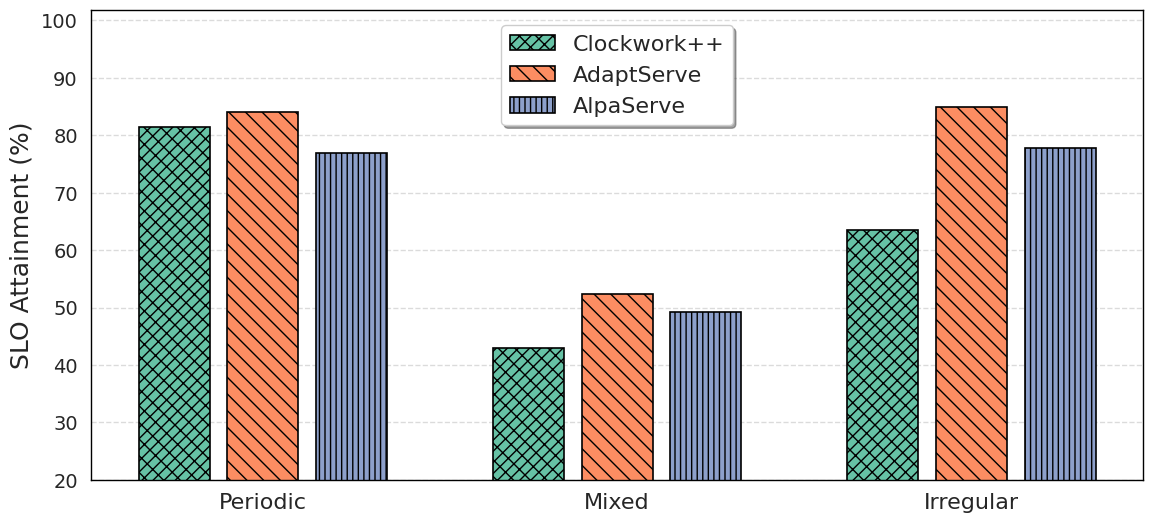

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np

# 假设这些辅助函数和变量已经定义
def method2order(method):
    # 定义方法的排序逻辑
    order = {
        "sr-replace": 1,
        "AdaptServe": 2,
        "mp-search-sep": 3,
        # "heuristic-dynamic": 1,
        # "dqn-dynamic": 2,
        # "mp-ilp-dynamic": 3,
        # "sr-replace-dynamic": 4,
        # 'mp-ilp': 5,
        # 'mp-search-sep': 6,
        # 'sr-greedy': 7,
        # 添加其他策略
    }
    return order.get(method, 99)

def show_name(method):
    # 定义方法的显示名称
    names = {
        "sr-replace": "Clockwork++",
        "AdaptServe": "AdaptServe",
        "mp-search-sep": "AlpaServe",
        # "heuristic-dynamic": "Heuristic-Dynamic",
        # "dqn-dynamic": "DQN-Dynamic",
        # "mp-ilp-dynamic": "ILP-Dynamic",
        # "sr-replace-dynamic": "SR-Dynamic",
        # 'mp-ilp': 'ILP',
        # 'mp-search-sep': 'AlpaServe',
        # 'sr-greedy': 'SR',
        # 'sr-replace': 'Clock++',
        # 添加其他策略名称
    }
    return names.get(method, method)

# 定义颜色和填充样式
# 使用颜色盲友好调色板
methodcolors = sns.color_palette("Set2", 10)  # 根据需要调整数量
# 增加填充样式的密度和差异性
methodhatches = ['/\/\/', '\\\\', '|||', '---', '+++', 'xxx', 'ooo', 'OOO', '...', '***']  # 更密集和差异化的填充样式

def plot_goodput_comparison_bar(df, policies, target, x_labels=None, xlabel='Target Variable', 
                                output='goodput_comparison_bar.png', ybottom=0, plot_legend=True):
    """
    绘制不同 arrival_process 下不同策略的 Goodput 随目标变量变化的柱状图，并将图例放在上方。

    参数:
    df : DataFrame - 包含政策、目标变量和 Goodput 的数据框。
    policies : list - 策略名称列表。
    target : list of tuples - 目标变量列表，每个元组包含 (num_devices, cv_scale, arrival_process)。
    x_labels : list of str, optional - 每个柱状簇的标签列表。如果提供，将覆盖默认生成的标签。
    xlabel : str - X轴标签，默认'Target Variable'。
    output : str - 输出图片文件名，默认'goodput_comparison_bar.png'。
    ybottom : float - Y轴下限，默认0。
    plot_legend : bool - 是否显示图例，默认True。
    """
    # 设置整体风格
    sns.set(style="whitegrid")

    # 定义辅助函数以提取 cv_scale 或 cv
    def extract_cv_scale(kwargs_str):
        try:
            kwargs = ast.literal_eval(kwargs_str)
            return kwargs.get('cv_scale', kwargs.get('cv', np.nan))
        except (ValueError, SyntaxError):
            return np.nan

    # 提取 cv_scale 并创建 combined_target，包括 arrival_process
    df['cv_scale'] = df['arrival_process_kwargs'].apply(extract_cv_scale)
    df['combined_target'] = list(zip(df['num_devices'], df['cv_scale'], df['arrival_process']))

    # 过滤数据 based on target tuples
    df_filtered = df[df['combined_target'].isin(target)]

    # 排序 target_list as per the target order provided
    target_list_sorted = target  # 假设 target 已经按照所需顺序排列

    # 转换 target tuples to strings for x-axis labels, or use x_labels if provided
    if x_labels is not None:
        if len(x_labels) != len(target_list_sorted):
            raise ValueError("Length of x_labels must match length of target")
        target_labels = x_labels
    else:
        target_labels = [f"{t[0]}-{t[1]}-{t[2]}" for t in target_list_sorted]

    num_policies = len(policies)
    num_targets = len(target_list_sorted)

    # 定义每组柱状图的宽度和位置
    total_group_width = 0.7  # 总宽度设为0.7，留出0.1的空隙
    spacing_ratio = 0.25  # 设置柱子之间的间距比例
    # 计算每个柱子的宽度，留出间距
    bar_width = total_group_width / (num_policies + (num_policies - 1) * spacing_ratio)
    spacing = bar_width * spacing_ratio  # 计算实际间距

    x = np.arange(num_targets)  # 目标变量的位置

    # 设置图形尺寸，并启用 constrained_layout
    fig_width = max(12, 0.5 * num_targets)  # 动态调整图宽，确保标签不重叠
    fig, ax = plt.subplots(figsize=(fig_width, 6), constrained_layout=True)

    # 用于收集所有柱状图和标签以创建统一的图例
    all_bars = []
    all_legends = []

    # 计算 y_max 全局最大值以统一 y 轴
    y_max_global = 0
    goodput_dict = {policy: [] for policy in policies}

    for policy in policies:
        for t in target_list_sorted:
            df_policy_target = df_filtered[
                (df_filtered['policy_name'] == policy) &
                (df_filtered['combined_target'] == t)
            ]
            if not df_policy_target.empty:
                mean_goodput = df_policy_target['goodput'].mean() * 100  # 转换为百分比
            else:
                mean_goodput = np.nan  # 使用 NaN 表示缺失数据
            goodput_dict[policy].append(mean_goodput)

        # 更新 y_max_global
        current_max = max([val for val in goodput_dict[policy] if not np.isnan(val)] + [0])
        y_max_global = max(y_max_global, current_max)

    # 绘制每个策略的柱状图
    for i, policy in enumerate(sorted(policies, key=lambda x: method2order(x))):
        # 计算每个柱的位置，确保柱子居中且有空隙
        offset = (i * (bar_width + spacing)) - (total_group_width / 2) + bar_width / 2
        bar_positions = x + offset

        # 提取当前策略的 Goodput 数据
        goodput_values = goodput_dict[policy]

        # 绘制柱状图，处理缺失数据
        bars = ax.bar(bar_positions, 
                      [val if not np.isnan(val) else 0 for val in goodput_values],
                      width=bar_width,
                      color=methodcolors[i % len(methodcolors)],
                      hatch=methodhatches[i % len(methodhatches)],
                      label=show_name(policy),
                      edgecolor='black',
                      linewidth=1.2)

        # 记录图例
        all_bars.append(bars[0])
        all_legends.append(show_name(policy))

        # 添加“×”标记表示缺失数据，稍微上移避免与 x 轴重叠
        for j, val in enumerate(goodput_values):
            if np.isnan(val):
                # 将“×”标记放置在 ybottom + 2.5% 的位置，确保不与 x 轴重叠
                ax.plot(bar_positions[j], ybottom + (y_max_global * 0.025), marker='x', color='brown', markersize=10, markeredgewidth=2)

    # 设置轴标签和标题
    ax.set_xlabel(xlabel, fontsize=20, labelpad=10)  # 增加字体大小

    # 设置 y 轴标签
    ax.set_ylabel("SLO Attainment (%)", fontsize=18, labelpad=5)

    # 设置 x 轴刻度
    ax.set_xticks(x)
    ax.set_xticklabels(target_labels, fontsize=16, ha='center', rotation=0)  # 增加字体大小

    # 设置 y 轴刻度
    ax.tick_params(axis='y', which='major', labelsize=14)
    ax.tick_params(axis='x', which='major', labelsize=16)  # 增加字体大小

    # 设置 Y 轴范围
    ax.set_ylim(bottom=ybottom, top=max(y_max_global * 1.2, 100))  # 增加10%空间

    # 仅显示横向网格线，并确保网格线与刻度对齐
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.grid(False, axis='x')  # 移除竖向网格线

    # 确保边框可见
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)  # 设置边框线宽
        spine.set_color('black')  # 设置边框颜色

    # 添加统一的图例在图表内部的右上角
    if plot_legend:
        ax.legend(all_bars, all_legends, fontsize=16, 
              loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=1,
              frameon=True, fancybox=True, shadow=True)

    # 调整布局，为图例留出空间，并减少边缘空白
    plt.tight_layout(rect=[0, 0, 1, 0.95], pad=2)  # 为图例留出顶部空间，减少整体填充
    fig.set_size_inches(fig_width, 6)

    # 保存并显示图形
    plt.savefig(output, bbox_inches='tight', dpi=300)  # 增加 dpi 提高清晰度
    print(f"输出图表到 {output}")
    plt.show()


# 假设 motivation_df 已经定义并包含必要的数据
plot_goodput_comparison_bar(
    df=motivation_df, 
    policies=['sr-replace', 'mp-search-sep', 'AdaptServe'],
    target=[(8,4,'gamma'), (8,9,'mixed'), (20,9,'azure_v1')],
    x_labels=['Periodic', 'Mixed', 'Irregular'],  # 传入自定义的 x_labels
    xlabel='', 
    output='motivation.pdf', 
    ybottom=20, 
    plot_legend=True
)


问题发现：
在低请求量和请求量均匀的情况下，模型进行分组对集群总的goodput性能的增益更好。

问题解释：
若模型分组，模型只能用到一部分的集群资源，通过并行放置得到的增益会减少，在低请求量和请求量均匀时模型分组能够通过优化资源的分配和提高负载均衡来增强集群的 overall goodput，但在高请求量和请求量不均匀时无法更好地利用集群资源通过并行提高性能增益。

/tmp/ipykernel_12642/2935276025.py:151: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 1], pad=1)


输出图表到 main_result.pdf


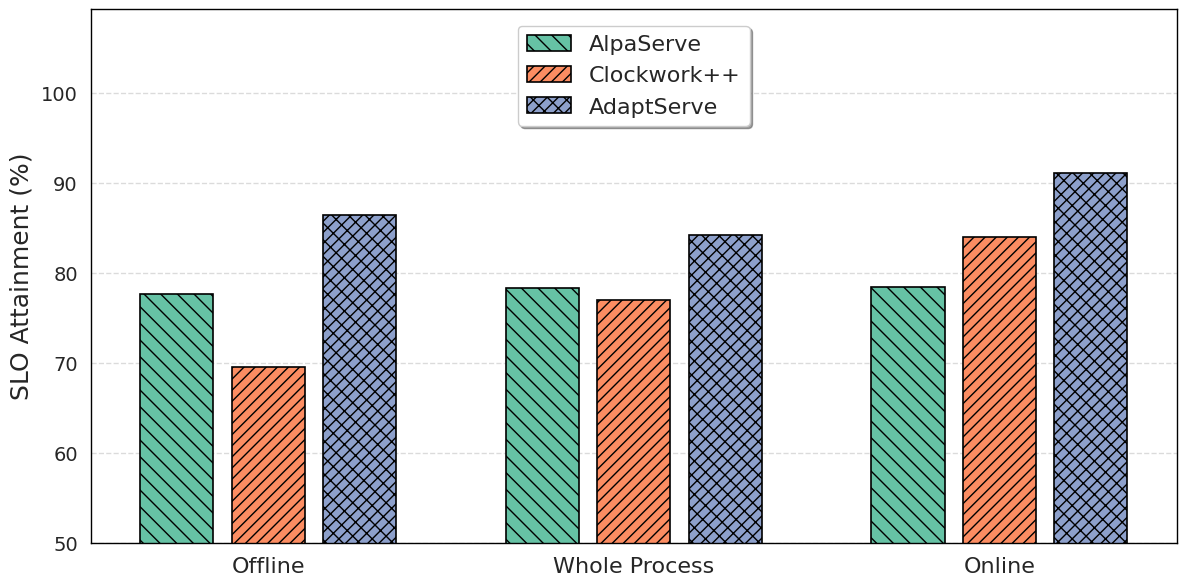

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 假设这些辅助函数和变量已经定义
def method2order(method):
    # 定义方法的排序逻辑
    order = {
        "AlpaServe": 1,
        "Clockwork++": 2,
        "AdaptServe": 3,
        # "heuristic-dynamic": 1,
        # "dqn-dynamic": 2,
        # "mp-ilp-dynamic": 3,
        # "sr-replace-dynamic": 4,
        # 'mp-ilp': 5,
        # 'mp-search-sep': 6,
        # 'sr-greedy': 7,
        # 添加其他策略
    }
    return order.get(method, 99)

def show_name(method):
    # 定义方法的显示名称
    names = {
        "sr-replace": "Clockwork++",
        "AdaptServe": "AdaptServe",
        "mp-search-sep": "AlpaServe",
        # "heuristic-dynamic": "Heuristic-Dynamic",
        # "dqn-dynamic": "DQN-Dynamic",
        # "mp-ilp-dynamic": "ILP-Dynamic",
        # "sr-replace-dynamic": "SR-Dynamic",
        # 'mp-ilp': 'ILP',
        # 'mp-search-sep': 'AlpaServe',
        # 'sr-greedy': 'SR',
        # 'sr-replace': 'Clock++',
        # 添加其他策略名称
    }
    return names.get(method, method)

# 定义颜色和填充样式
methodcolors = sns.color_palette("Set2", 10)  # 根据需要调整数量
methodhatches = ['\\\\', '///', '/\/\/', '---', '+++', 'xxx', 'ooo', 'OOO', '...', '***']

def plot_goodput_comparison_bar(df, policies, target, x_labels=None, xlabel='Target Variable', 
                                output='goodput_comparison_bar.png', ybottom=0, plot_legend=True):
    """
    绘制不同 arrival_process 下不同策略的 Goodput 随目标变量变化的柱状图，并将图例放在上方。
    """
    sns.set(style="whitegrid")

    # 定义数据
    # 这里我们直接将您的数据添加到 DataFrame 中
    data = {
        'policy_name': ['AlpaServe', 'Clockwork++', 'AdaptServe', 'AlpaServe', 'Clockwork++', 'AdaptServe', 'AlpaServe', 'Clockwork++', 'AdaptServe'],
        'goodput': [0.777, 0.696, 0.865, 0.783, 0.77, 0.842, 0.785, 0.840, 0.911],
        'stage': ['Offline', 'Offline', 'Offline', 'Whole Process', 'Whole Process', 'Whole Process','Online', 'Online', 'Online'],
    }
    
    # 转换为 DataFrame
    df = pd.DataFrame(data)
    
    # 处理目标标签
    if x_labels is None:
        x_labels = ['Offline', 'Whole Process', 'Online']

    num_policies = len(policies)
    num_targets = len(x_labels)

    # 定义每组柱状图的宽度和位置
    total_group_width = 0.7
    spacing_ratio = 0.25
    bar_width = total_group_width / (num_policies + (num_policies - 1) * spacing_ratio)
    spacing = bar_width * spacing_ratio

    x = np.arange(num_targets)  # 目标变量的位置

    # 设置图形尺寸，并启用 constrained_layout
    fig_width = max(12, 0.5 * num_targets)
    fig, ax = plt.subplots(figsize=(fig_width, 6), constrained_layout=True)

    all_bars = []
    all_legends = []

    y_max_global = 0
    goodput_dict = {policy: [] for policy in policies}

    for policy in policies:
        for stage in x_labels:
            df_policy_stage = df[(df['policy_name'] == policy) & (df['stage'] == stage)]
            if not df_policy_stage.empty:
                mean_goodput = df_policy_stage['goodput'].mean() * 100  # 转换为百分比
            else:
                mean_goodput = np.nan
            goodput_dict[policy].append(mean_goodput)

        # 更新 y_max_global
        current_max = max([val for val in goodput_dict[policy] if not np.isnan(val)] + [0])
        y_max_global = max(y_max_global, current_max)

    # 绘制每个策略的柱状图
    for i, policy in enumerate(sorted(policies, key=lambda x: method2order(x))):
        # 计算每个柱的位置，确保柱子居中且有空隙
        offset = (i * (bar_width + spacing)) - (total_group_width / 2) + bar_width / 2
        bar_positions = x + offset

        # 提取当前策略的 Goodput 数据
        goodput_values = goodput_dict[policy]

        # 绘制柱状图，处理缺失数据
        bars = ax.bar(bar_positions, 
                      [val if not np.isnan(val) else 0 for val in goodput_values],
                      width=bar_width,
                      color=methodcolors[i % len(methodcolors)],
                      hatch=methodhatches[i % len(methodhatches)],
                      label=show_name(policy),
                      edgecolor='black',
                      linewidth=1.2)

        all_bars.append(bars[0])
        all_legends.append(show_name(policy))

    # 设置轴标签和标题
    ax.set_xlabel(xlabel, fontsize=20, labelpad=10) 
    ax.set_ylabel("SLO Attainment (%)", fontsize=18, labelpad=5)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=16, ha='center', rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=14)
    ax.tick_params(axis='x', which='major', labelsize=16)

    # 设置 Y 轴范围
    ax.set_ylim(bottom=ybottom, top=max(y_max_global * 1.2, 100))

    # 仅显示横向网格线
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.grid(False, axis='x')

    # 确保边框可见
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)
        spine.set_color('black')

    # 添加统一的图例在图表内部的右上角
    if plot_legend:
        ax.legend(all_bars, all_legends, fontsize=16, 
                  loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=1,
                  frameon=True, fancybox=True, shadow=True)

    plt.tight_layout(rect=[0, 0, 1, 1], pad=1)
    fig.set_size_inches(fig_width, 6)

    # 保存并显示图形
    plt.savefig(output, bbox_inches='tight', dpi=300)
    print(f"输出图表到 {output}")
    plt.show()


# 调用绘图函数
plot_goodput_comparison_bar(
    df=None,  # 数据已在内部定义
    policies=['AlpaServe', 'Clockwork++', 'AdaptServe'],
    target=None,  # 数据已在内部定义
    x_labels=['Offline', 'Whole Process', 'Online'],
    xlabel='', 
    output='main_result.pdf', 
    ybottom=50, 
    plot_legend=True
)
